In [1]:
import pandas as pd
import scipy.stats as stat

In [2]:
data=pd.read_csv('Sales_data_zone_wise.csv')

In [3]:
data.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


In [4]:
data.shape

(29, 5)

In [5]:
data.isnull().any()

Month       False
Zone - A    False
Zone - B    False
Zone - C    False
Zone - D    False
dtype: bool

# 1)

In [6]:
A,B,C,D=data[['Zone - A','Zone - B','Zone - C','Zone - D']].mean()

In [7]:
x={'A':A,'B':B,'C':C,'D':D}
for key,value in x.items():
    print('Avg. sales in zone',key,'is',value)

Avg. sales in zone A is 1540493.1379310344
Avg. sales in zone B is 1755559.5862068965
Avg. sales in zone C is 1772871.0344827587
Avg. sales in zone D is 1842926.7586206896


# 2)

In [8]:
list_1=list(data)
list_1.remove('Month')
data[list_1].sum(axis=1)


0     7022544
1     7152303
2     6475939
3     8174449
4     5995328
5     7151387
6     7287108
7     7816299
8     6703395
9     7128210
10    7032783
11    6111084
12    5925424
13    7155515
14    5934156
15    6506659
16    7149383
17    7083490
18    6971953
19    7124599
20    7389597
21    7560001
22    6687919
23    7784747
24    6095918
25    6512360
26    6267918
27    7470920
28    6772277
dtype: int64

This values shows the total sum of sales for each month

# 3)

For checking whether all the zones generate the same amount of sales an one way anova test is going to be done.


For that
H0:Mean of sales for all zones are equal


H1:Mean of sales of all zones are not equal

alpha=0.05

In [9]:
from scipy.stats import f_oneway
f_oneway(data['Zone - A'], data['Zone - B'], data['Zone - C'],data['Zone - D'])


F_onewayResult(statistic=5.672056106843581, pvalue=0.0011827601694503335)

Since pvalue:0.001182760169450 is less than alpha:0.05, we'll reject the null hypothesis and conclude that mean of sales for all zones are not the same

<AxesSubplot:>

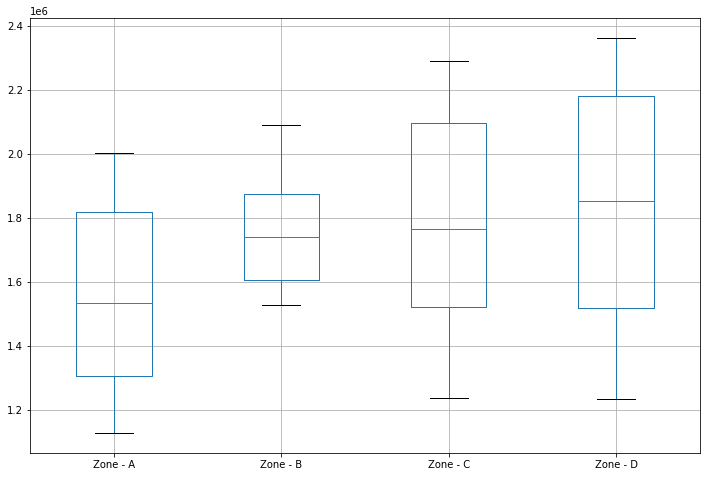

In [10]:
data.boxplot(column=['Zone - A','Zone - B','Zone - C','Zone - D'],figsize=(12,8))

From the boxplot also we can see that sales are not the same for the different zones